In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [22]:
# The data files is stored in the data directory under the root directory of this repo. 
#data_dir = "../../data/data/dataanalysis/"
# Name of the file being read
#case_sheet = "bmc_tests_july.xlsb"

#Read the file
#data = pd.read_excel(data_dir+case_sheet,engine='pyxlsb',header=None)

In [11]:
data = pd.read_excel('bmc_tests_july.xlsx')

## Pre-Processing & Completeness Check


In [12]:
# Some sheets have a blank row at top and some don't. By reading without header, dropping the blank rows and assigning the top row as header back, we can fix this. 
# If there is a better solution to this, or later if this problem is resolved if we shift to S3 containers, feel free to edit. 

data = data.dropna(how='all')
data.columns = data.iloc[0]
data = data[1:]

In [13]:
# Count all the non-na (non-empty) values in each columns
nvals = data.notna().sum()
print(nvals)

0
Icmr ID                                                               71027
 Laboratory Name                                                      71027
 Patient ID                                                           71027
 Patient Name                                                             0
 Age                                                                  71027
 Age In                                                               71027
 Gender                                                               71027
 Contact Number                                                           0
 Contact Number Belongs To                                                0
 Email                                                                    0
 Nationality                                                          71027
 Aadhar Card Number                                                       0
 Passport Number                                                          0
 State of 

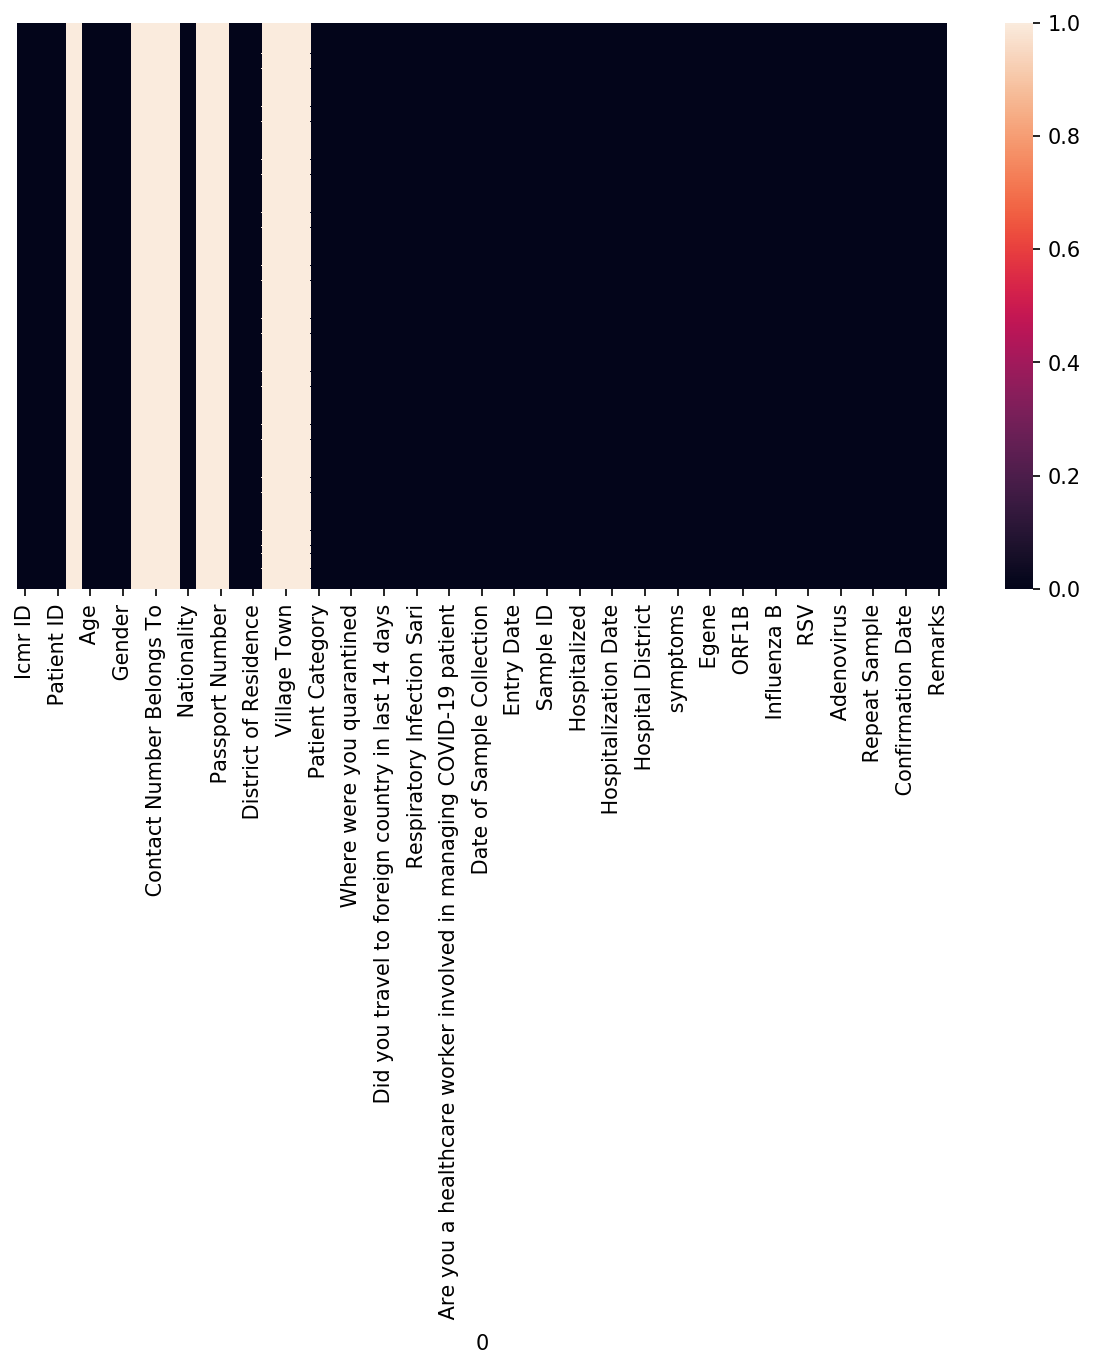

In [14]:
plt.figure(figsize=(10,5),dpi=150)
sns.heatmap(pd.isnull(data),yticklabels=False)

In [15]:
data[' Date of Sample Tested'] = pd.to_datetime(data[' Date of Sample Tested'])
data[' Date of Sample Tested']  = data[' Date of Sample Tested'].dt.date

In [16]:
data = data.drop(data[data[' Date of Sample Tested']<datetime.date(2020,7,1)].index)

In [17]:
data.dtypes

0
Icmr ID                                                               object
 Laboratory Name                                                      object
 Patient ID                                                           object
 Patient Name                                                         object
 Age                                                                  object
 Age In                                                               object
 Gender                                                               object
 Contact Number                                                       object
 Contact Number Belongs To                                            object
 Email                                                                object
 Nationality                                                          object
 Aadhar Card Number                                                   object
 Passport Number                                                      obje

In [18]:
dates = list(data[' Date of Sample Tested'].unique())
dates.sort(reverse=False)

In [27]:
data=data.drop(data[(data[' Egene']==' Under Process') & (data[' ORF1B']==' Under Process') & (data[' RDRP']==' Under Process')].index)

# Defining Functions

In [19]:
#FUNCTIONS RELATING TO TESTS
EGene_P = []
EGene_N = []
EGene_Positivity_Rate = []
EGene_Total = []

def egene_series():
    for i in range(len(dates)):
        df = data[data[' Date of Sample Tested']==dates[i]]
        if len(df[df[' Egene']==' Positive'])==0 and len(df[df[' Egene']==' Negative'])==0:
            P = 0
            N = 0
            PR = 0
        else:
            P = len(df[df[' Egene']==' Positive'])
            N = len(df[df[' Egene']==' Negative'])
            PR = (P/(N+P))*100
        
        total = N+P
             
        EGene_Total.append(total)
        EGene_P.append(P)
        EGene_N.append(N)
        EGene_Positivity_Rate.append(PR)
        
RDRP_P = []
RDRP_N = []
RDRP_Positivity_Rate = []
RDRP_Total = []

def rdrp_series():
    for i in range(len(dates)):
        df = data[data[' Date of Sample Tested']==dates[i]]
        if len(df[df[' RDRP']==' Positive'])==0 and len(df[df[' RDRP']==' Negative'])==0:
            P = 0
            N = 0
            PR = 0
        else:
            P = len(df[df[' RDRP']==' Positive'])
            N = len(df[df[' RDRP']==' Negative'])
            PR = (P/(N+P))*100
        
        total = N+P
            
        RDRP_Total.append(total)
        RDRP_P.append(P)
        RDRP_N.append(N)
        RDRP_Positivity_Rate.append(PR)
     
    
ORF1B_P = []
ORF1B_N = []
ORF1B_Positivity_Rate = []
ORF1B_Total = []

def ORF1B_series():
    for i in range(len(dates)):
        df = data[data[' Date of Sample Tested']==dates[i]]
        if len(df[df[' ORF1B']==' Positive'])==0 and len(df[df[' ORF1B']==' Negative'])==0:
            P = 0
            N = 0
            PR = 0
        else:
            P = len(df[df[' ORF1B']==' Positive'])
            N = len(df[df[' ORF1B']==' Negative'])
            PR = (P/(N+P))*100
        
        total = N+P
            
        ORF1B_Total.append(total)
        ORF1B_P.append(P)
        ORF1B_N.append(N)
        ORF1B_Positivity_Rate.append(PR)
        

In [46]:
#FUNCTIONS RELATING TO PLOTTING TESTS WITH A TIME SERIES
def test_ptr_plot(pr,total,test,dates):
    fig,ax = plt.subplots(2,1,figsize=(10,5),dpi=200)

    ax[0].plot(dates,pr,c='crimson')
    ax[0].set_xlim(dates[0],dates[-1],)
    ax[0].set_xlabel('Date of Sample Tested')
    ax[0].set_ylabel('Percentage (%)')
    ax[0].set_title(test +' Positivity Rate')

    ax[1].plot(dates,total,c='g')
    ax[1].set_xlim(dates[0],dates[-1],)
    ax[1].set_xlabel('Date of Sample Tested')
    ax[1].set_ylabel('Number of Samples')
    ax[1].set_title('Number of ' + test + ' Samples')

    plt.tight_layout()
    
    plt.savefig(test+'_ptr_graph.png')
    

def test_np_plot(positive,negative,test,dates):

    fig,ax = plt.subplots(figsize=(10,5),dpi=200)
    ax.plot(dates,positive)
    ax.plot(dates,negative)

    ax.set_xlim(dates[0],dates[-1],)
    ax.legend(['Positive','Negative'])

    plt.title( test + ' Tests')
    plt.xlabel('Date of Sample Tested')
    plt.ylabel('Number of Samples')
    
    plt.savefig(test+'_positive_negative_graph.png')
    


In [21]:
M = []
F = []

def gender_timeseries():
    for i in range(len(dates)):
        df = data[data[' Date of Sample Tested']==dates[i]]
        m = len(df[df[' Gender']==' M'])
        f = len(df[df[' Gender']==' F'])
        M.append(m)
        F.append(f)
        
M_P = []
F_P = []

def gender_positive_timeseries():
    for i in range(len(dates)):
        df = data[(data[' Date of Sample Tested']==dates[i])&(data[' Final Result Sample']==' Positive')]
        m = len(df[df[' Gender']==' M'])
        f = len(df[df[' Gender']==' F'])
        M_P.append(m)
        F_P.append(f)
        

M_N = []
F_N = []

def gender_negative_timeseries():
    for i in range(len(dates)):
        df = data[(data[' Date of Sample Tested']==dates[i])&(data[' Final Result Sample']==' Negative')]
        m = len(df[df[' Gender']==' M'])
        f = len(df[df[' Gender']==' F'])
        M_N.append(m)
        F_N.append(f)
        

In [22]:
def categorize_age(age):
    age = int(age)
    if age>=0 and age<=9:
        return '0-9'
    if age>9 and age<=19:
        return '10-19'
    if age>19 and age<=29:
        return '20-29'
    if age>29 and age<=39:
        return '30-39'
    if age>=39 and age<=49:
        return '40-49'
    if age>=49 and age<=59:
        return '50-59'
    if age>=59 and age<=69:
        return '60-69'
    if age>=69 and age<=79:
        return '70-79'
    if age>=79 and age<=89:
        return '80-89'
    if age>=89 and age<=99:
        return '90-99'
    else:
        return '99+'

In [23]:
top5kits = len(data[' Testing Kit Used'].value_counts().head(5).index)
True_PCR_Kelpest = []
ABI_Taqpath = []
ABI_Taqman = []
Ag_SD = []
SD_Biosensor = []
Others = []

def testing_kits_categorizer():
    for i in range(len(dates)):
        df = data[data[' Date of Sample Tested']==dates[i]]
        TPK = len(df[df[' Testing Kit Used']==' True PCR Kelpest'])
        A_Tpath = len(df[df[' Testing Kit Used']==' ABI Taqpath'])
        A_Tman = len(df[df[' Testing Kit Used']==' ABI Taqman'])
        Ag_SD_val = len(df[df[' Testing Kit Used']==' Ag-SD Biosensor Standard Q COVID-19 Ag detection kit'])
        SD_Bs = len(df[df[' Testing Kit Used']==' SD Biosensor'])
        Others_values = len(df)-TPK-A_Tpath-A_Tman-Ag_SD_val-SD_Bs
        
        True_PCR_Kelpest.append(TPK)
        ABI_Taqpath.append(A_Tpath)
        ABI_Taqman.append(A_Tman)
        Ag_SD.append(Ag_SD_val)
        SD_Biosensor.append(SD_Bs)
        Others.append(Others_values)
        

## Graphs


Text(0.5, 1.0, 'Distribution of Testing Kits Used')

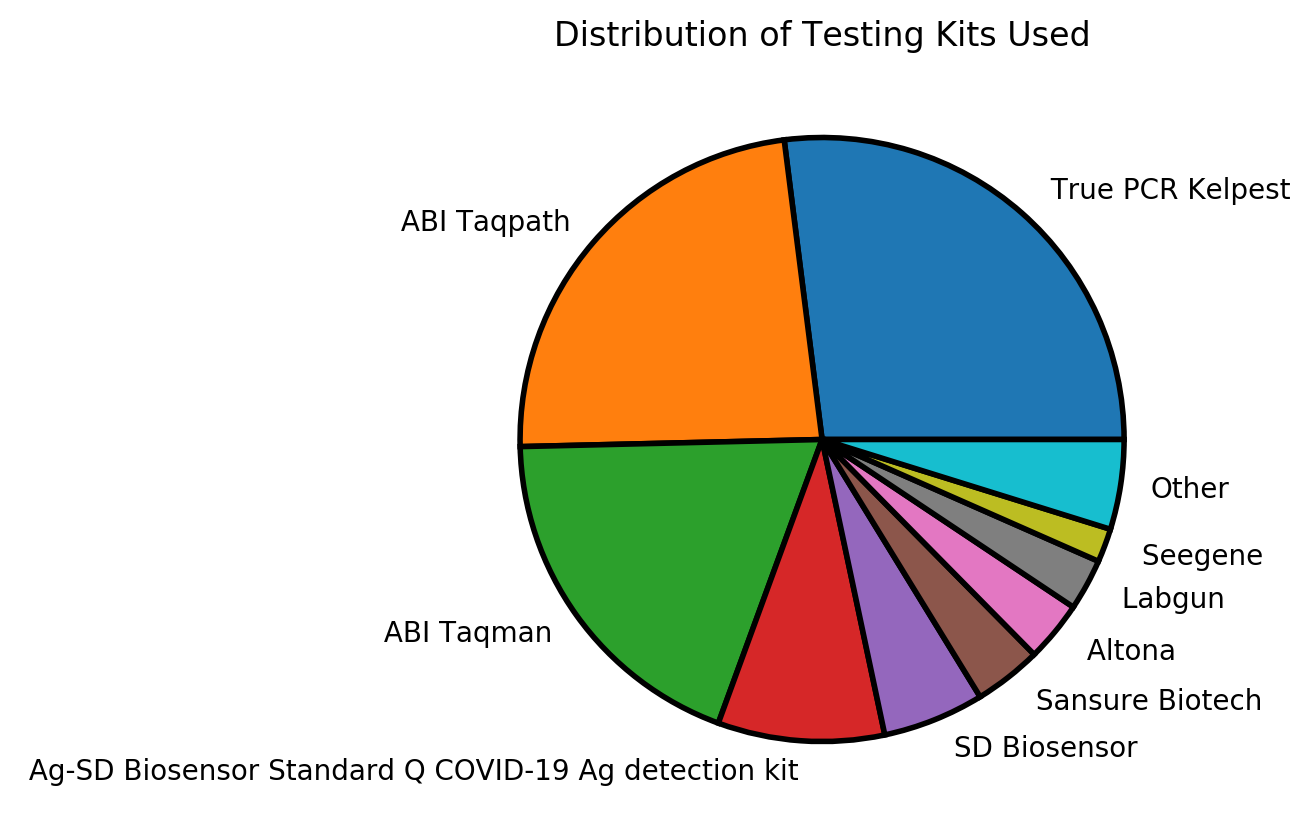

In [29]:
#DISTRIBUTION OF TESTING KITS USED
x = []
labels = []

df = pd.DataFrame(data[' Testing Kit Used'].value_counts())
total = df[' Testing Kit Used'].sum()
x = list(df[df[' Testing Kit Used']>1000][' Testing Kit Used'])
x.append(total-(df[df[' Testing Kit Used']>1000][' Testing Kit Used'].sum()))
labels = list(df[df[' Testing Kit Used']>1000].index)
labels.append('Other')

plt.figure(figsize=(10,5),dpi=200)
plt.pie(x=x,labels=labels,wedgeprops={'linewidth':2,'edgecolor':'black'})


plt.title('Distribution of Testing Kits Used')

#plt.savefig('distribution_of_testing_kids_used_piechart.png')

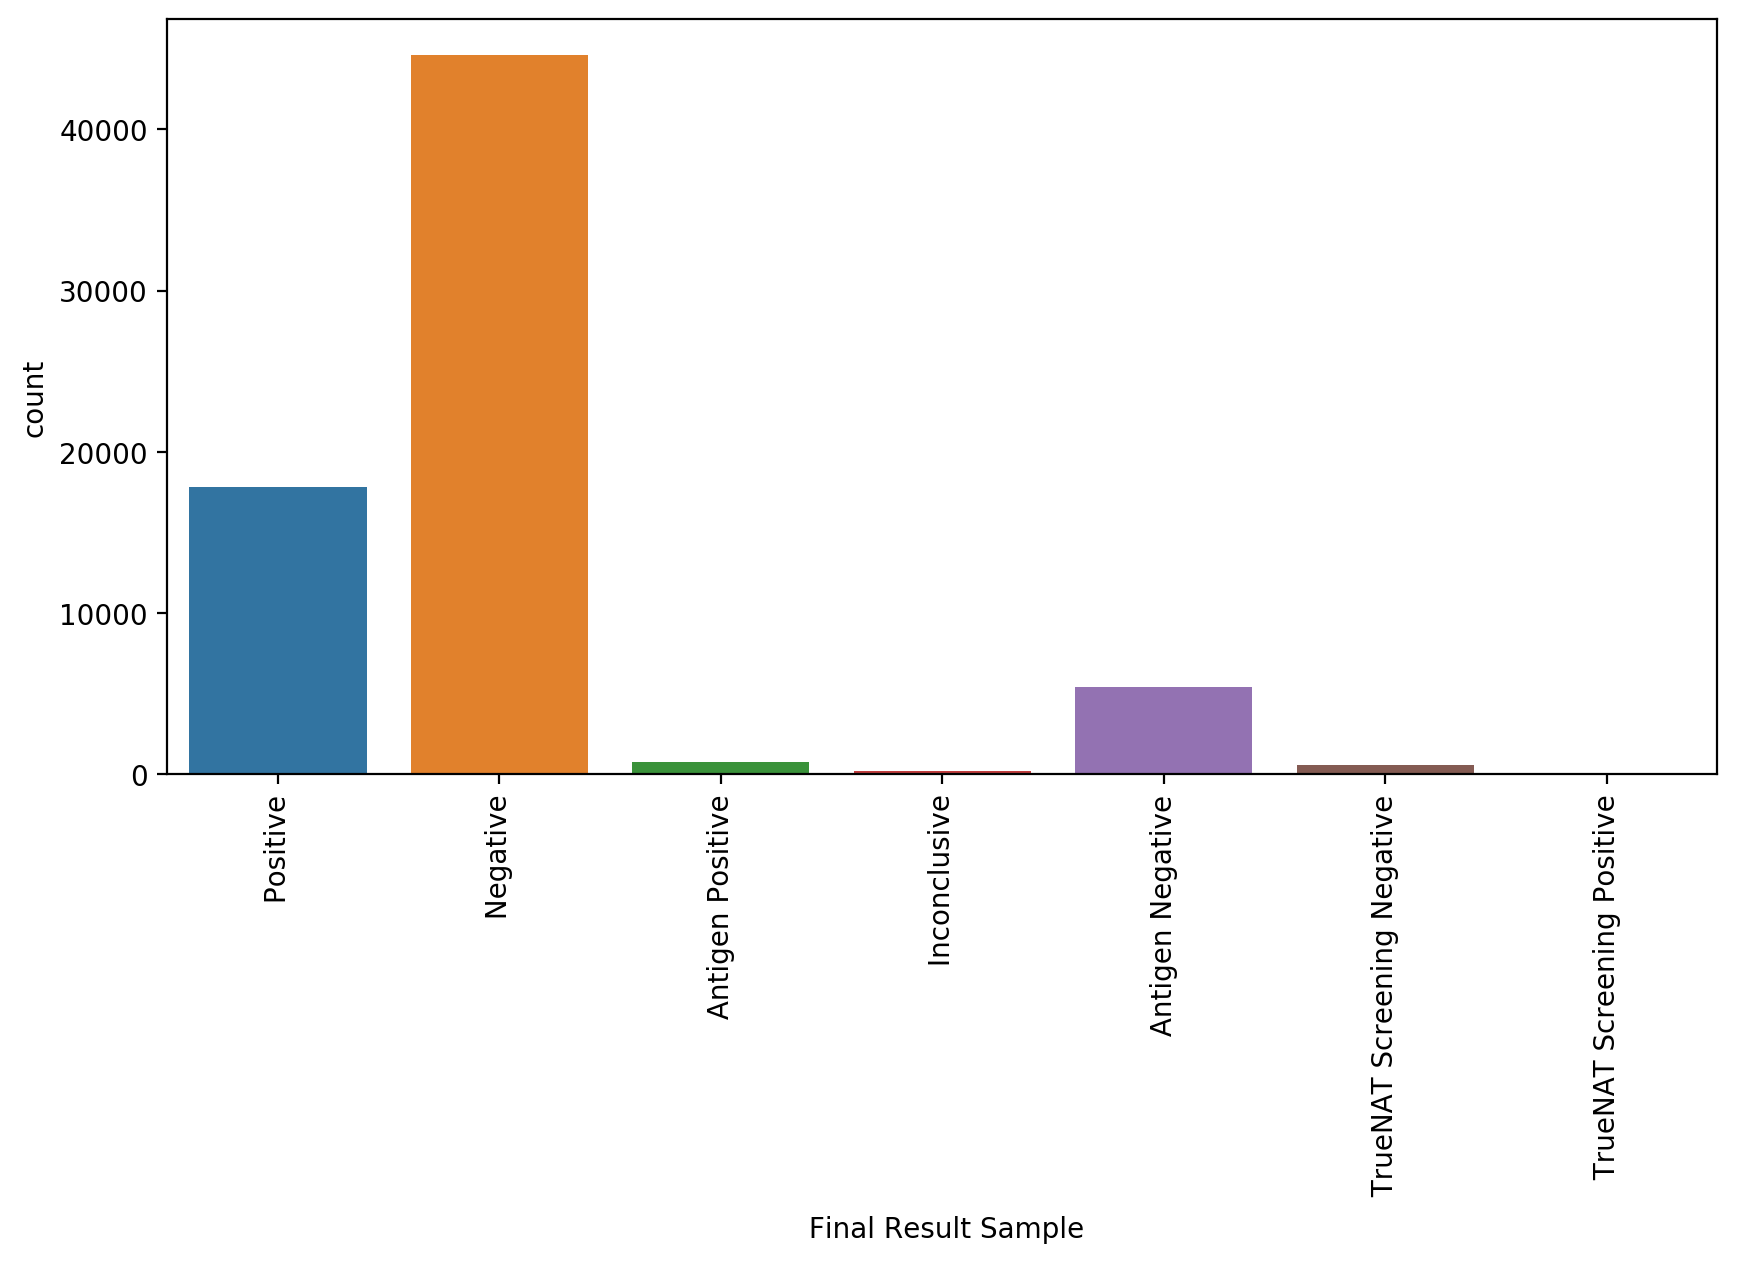

In [47]:
#COUNTPLOT OF FINAL RESULT SAMPLE
plt.figure(figsize=(10,5),dpi=200)
sns.countplot(x=' Final Result Sample',data=data)
plt.xticks(rotation=90)

#plt.savefig('Countplot of Final Result Sample')

In [31]:
#E GENE VISUALIZATION
egene_series()

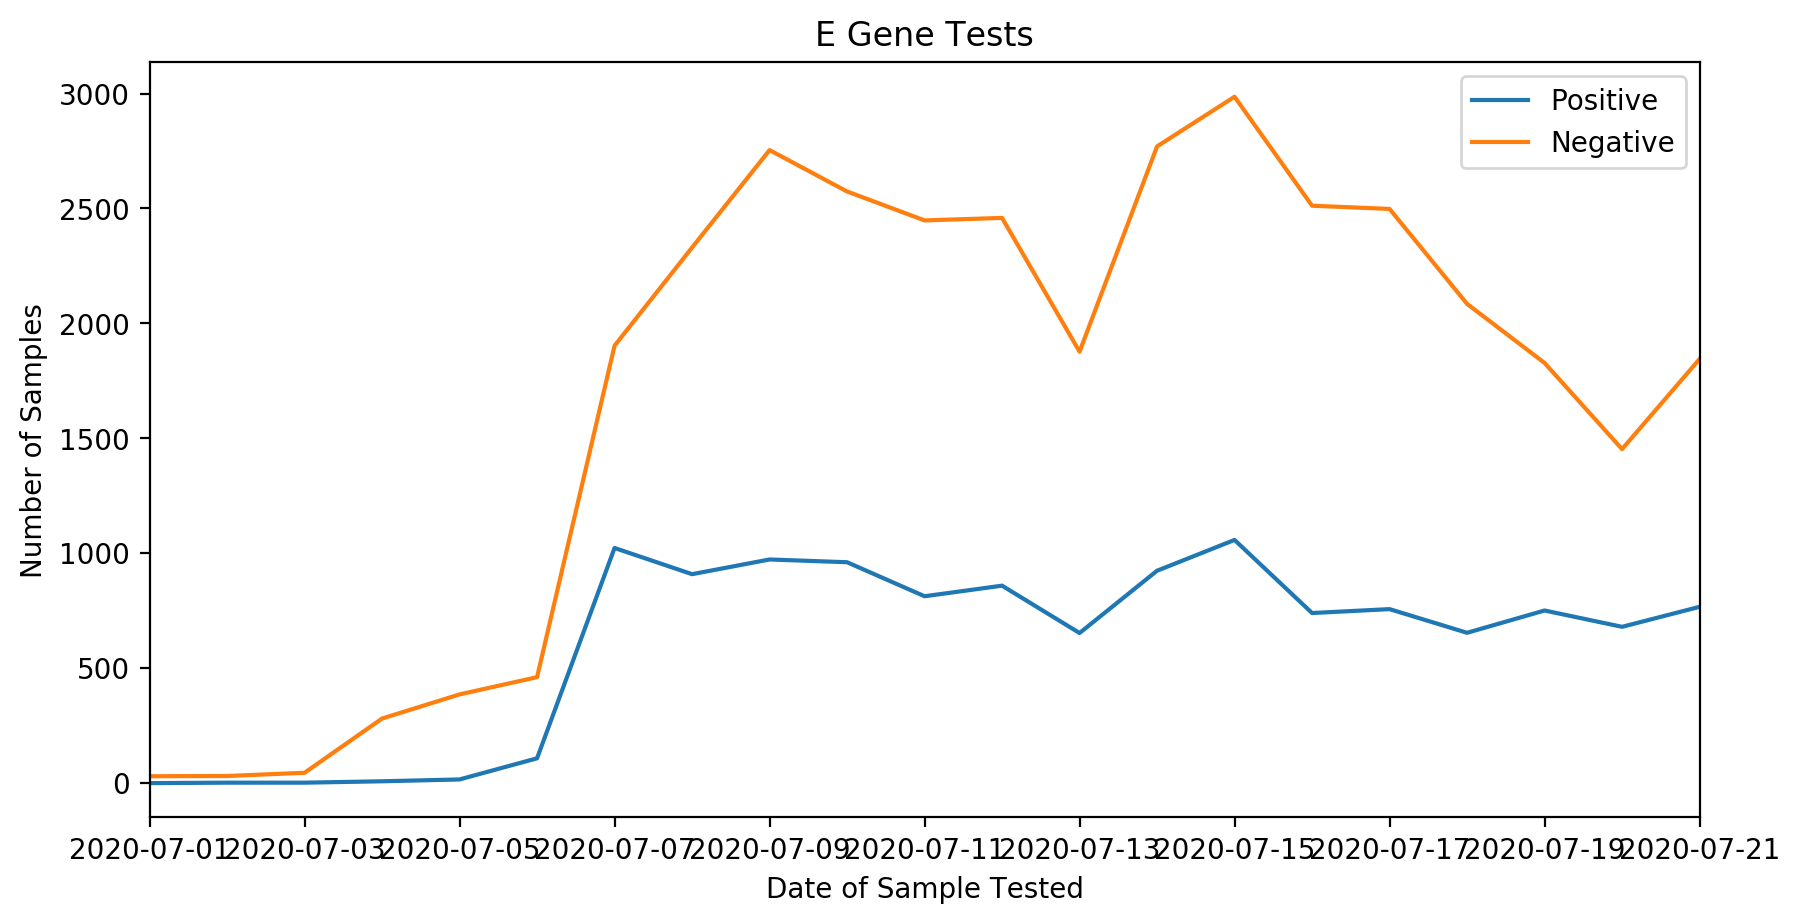

In [48]:
test_np_plot(EGene_P,EGene_N,'E Gene',dates)

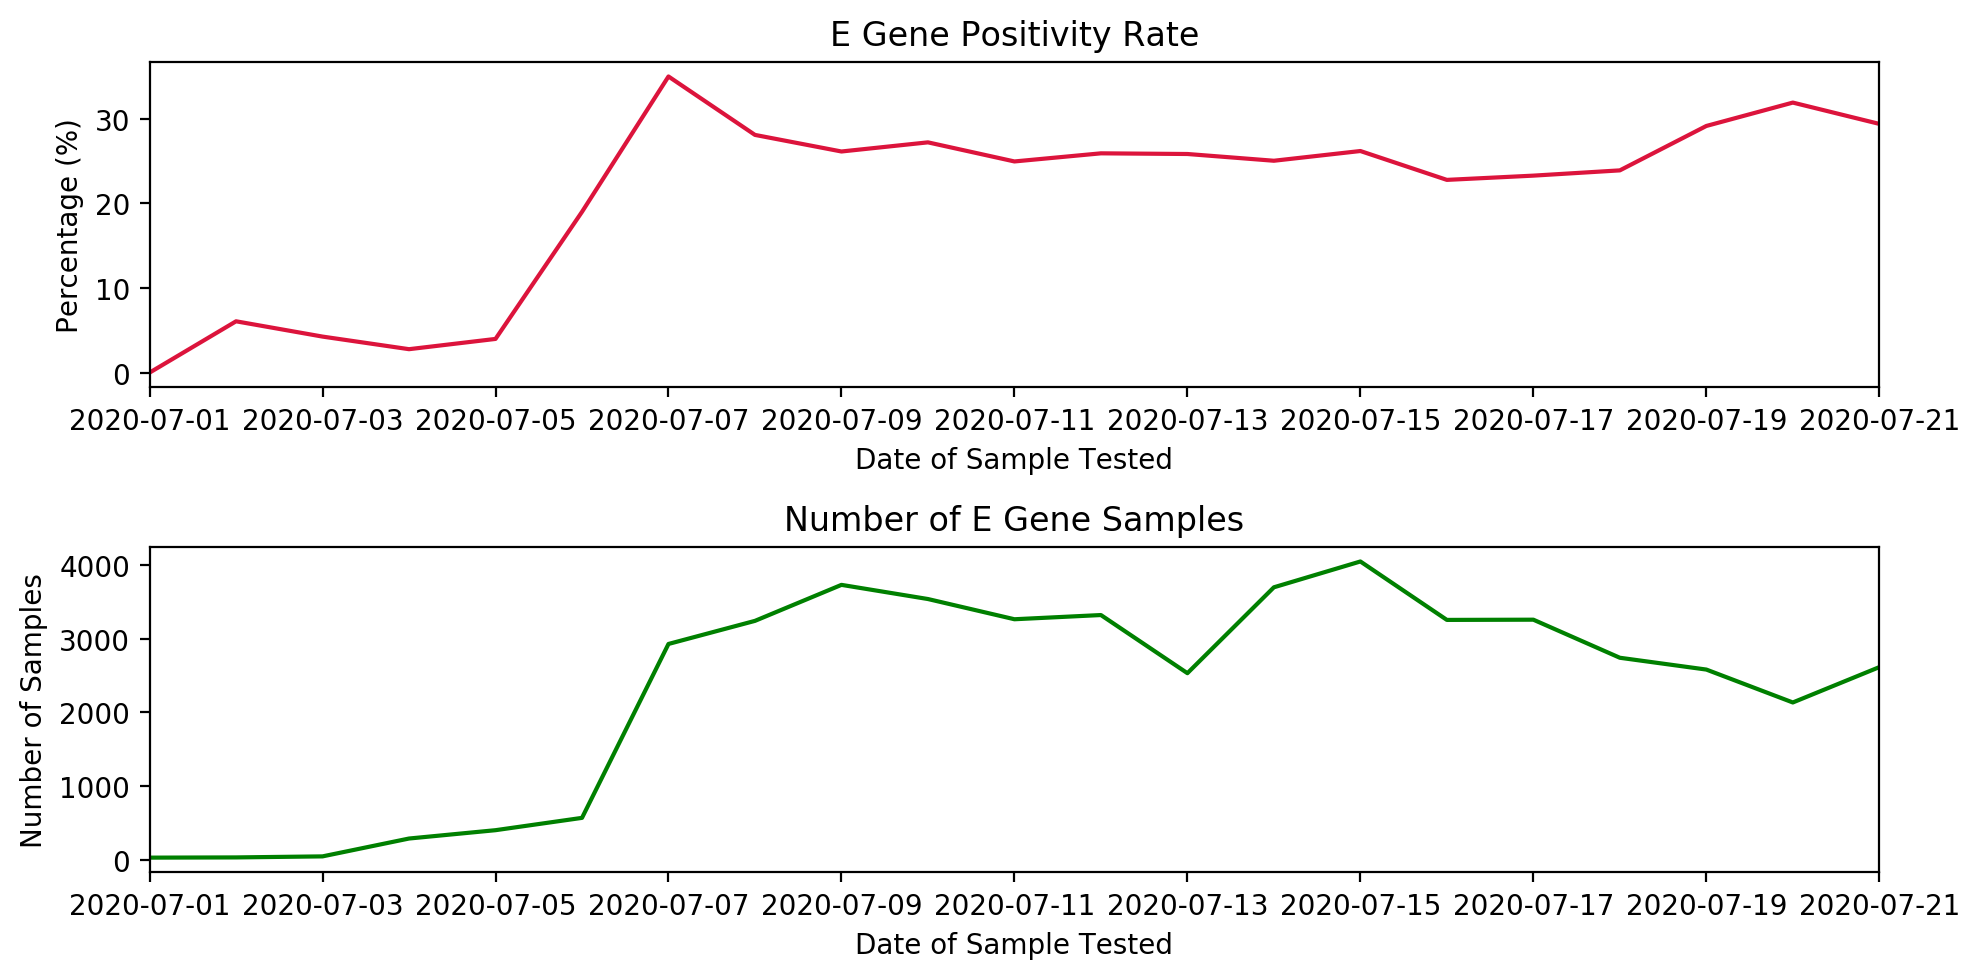

In [49]:
test_ptr_plot(EGene_Positivity_Rate,EGene_Total,'E Gene',dates)

In [36]:
#RDRP VISUALIZATION
rdrp_series()

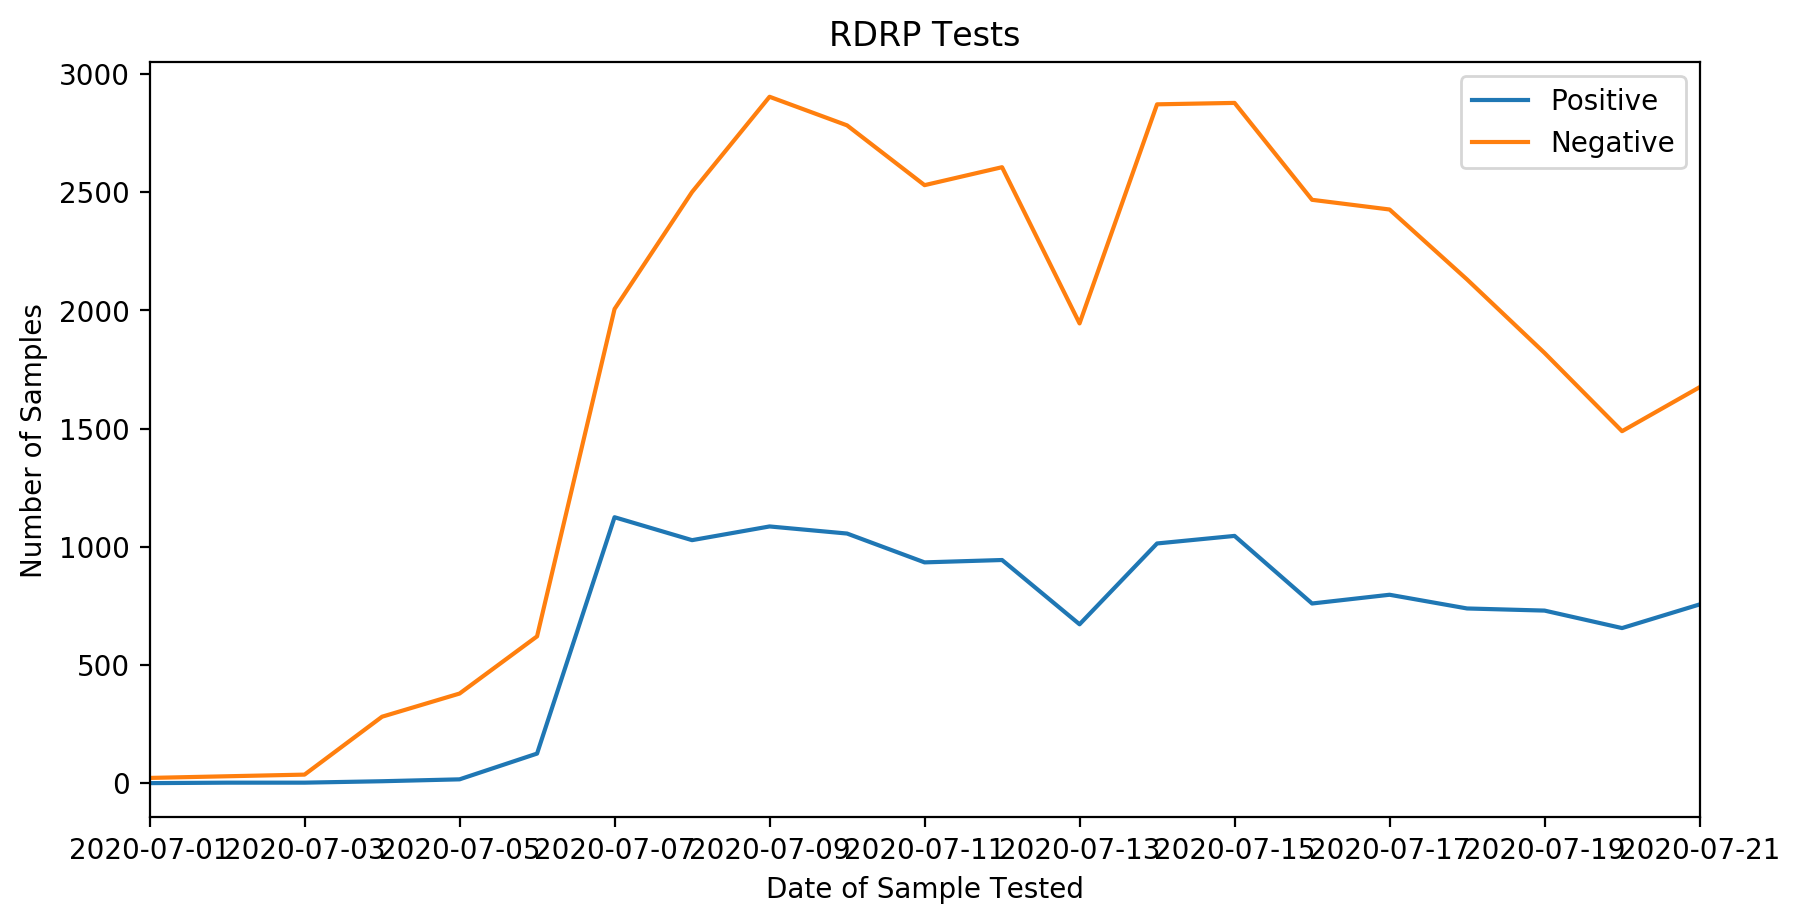

In [50]:
test_np_plot(RDRP_P,RDRP_N,'RDRP',dates)

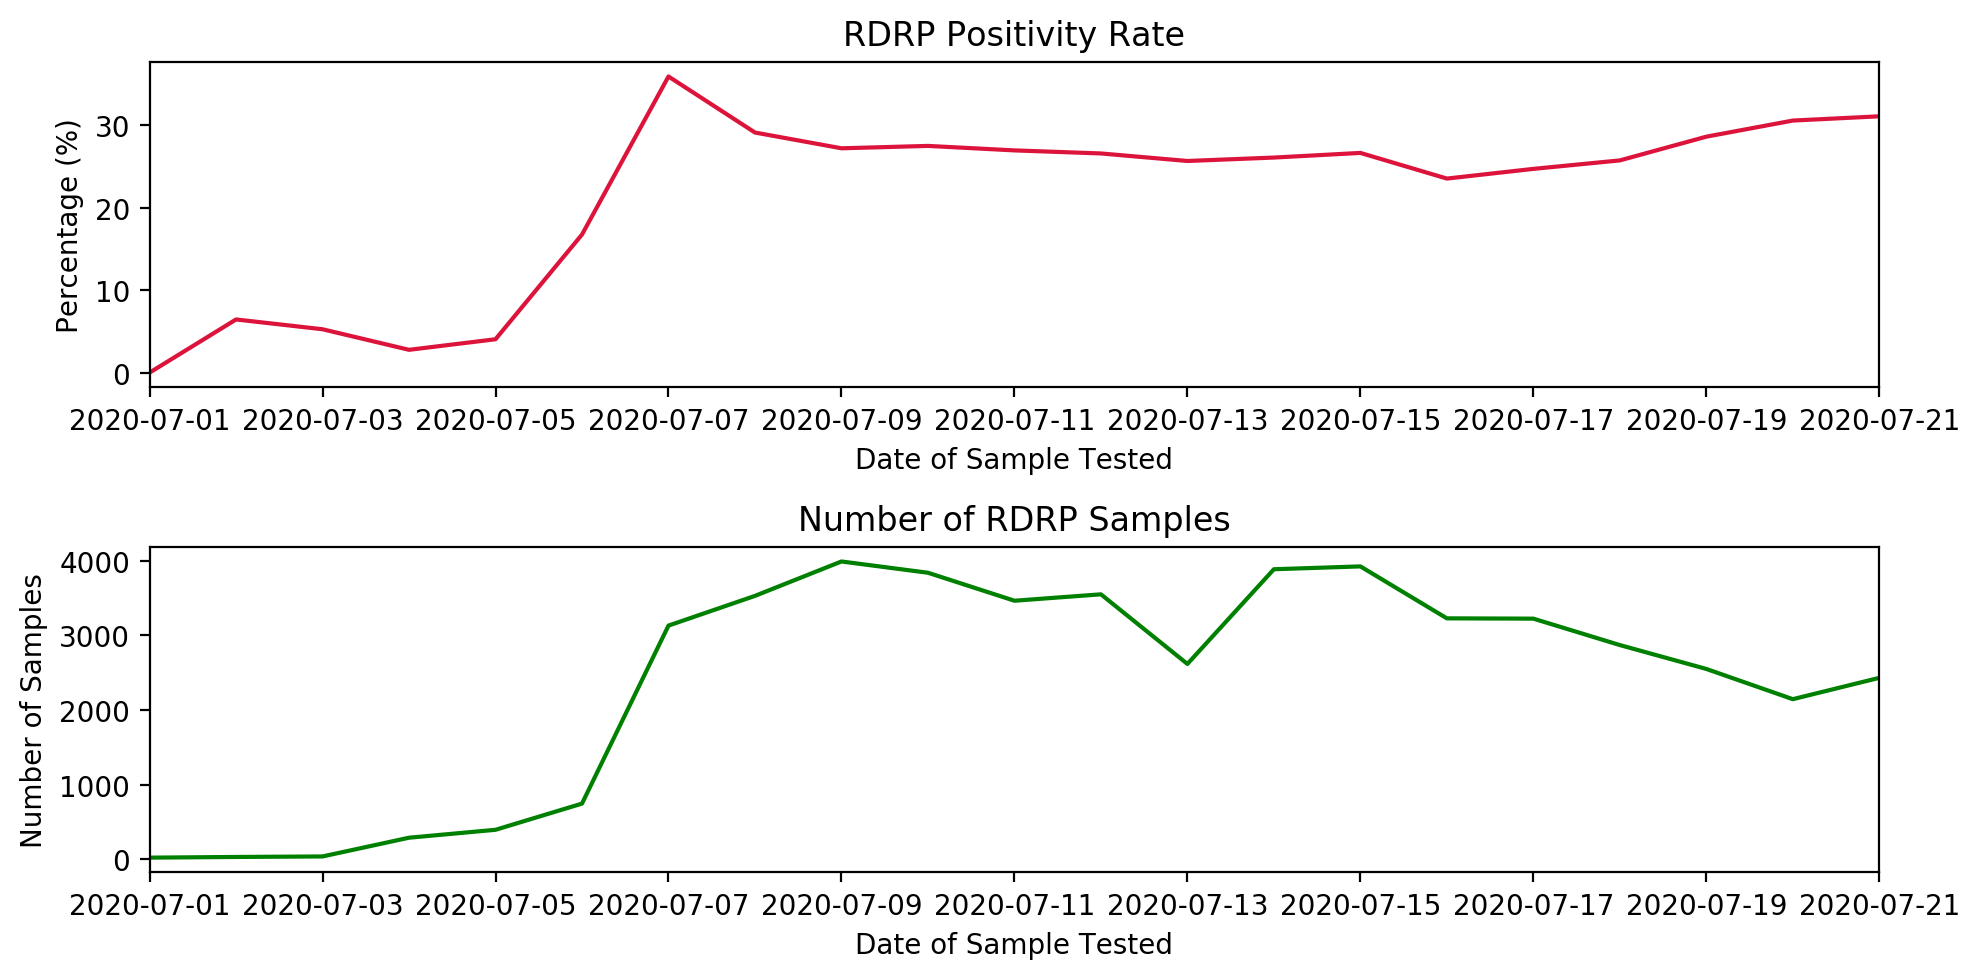

In [51]:
test_ptr_plot(RDRP_Positivity_Rate,RDRP_Total,'RDRP',dates)

In [39]:
#ORF1B VISUALIZATION
ORF1B_series()

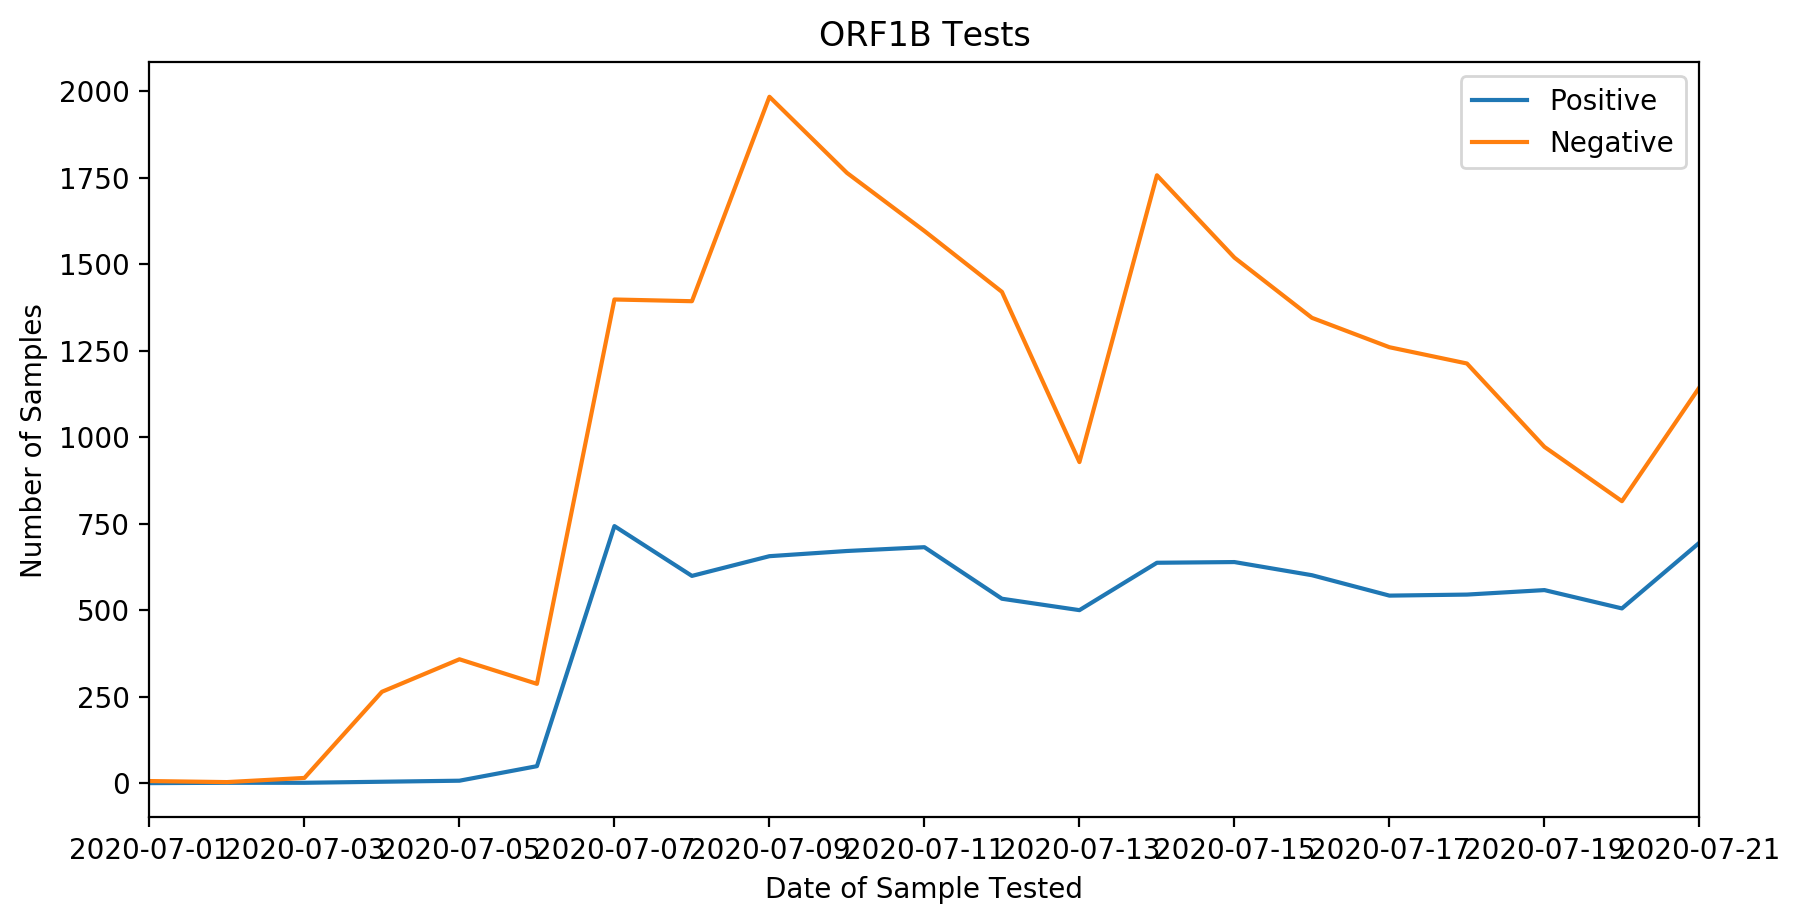

In [52]:
test_np_plot(ORF1B_P,ORF1B_N,'ORF1B',dates)

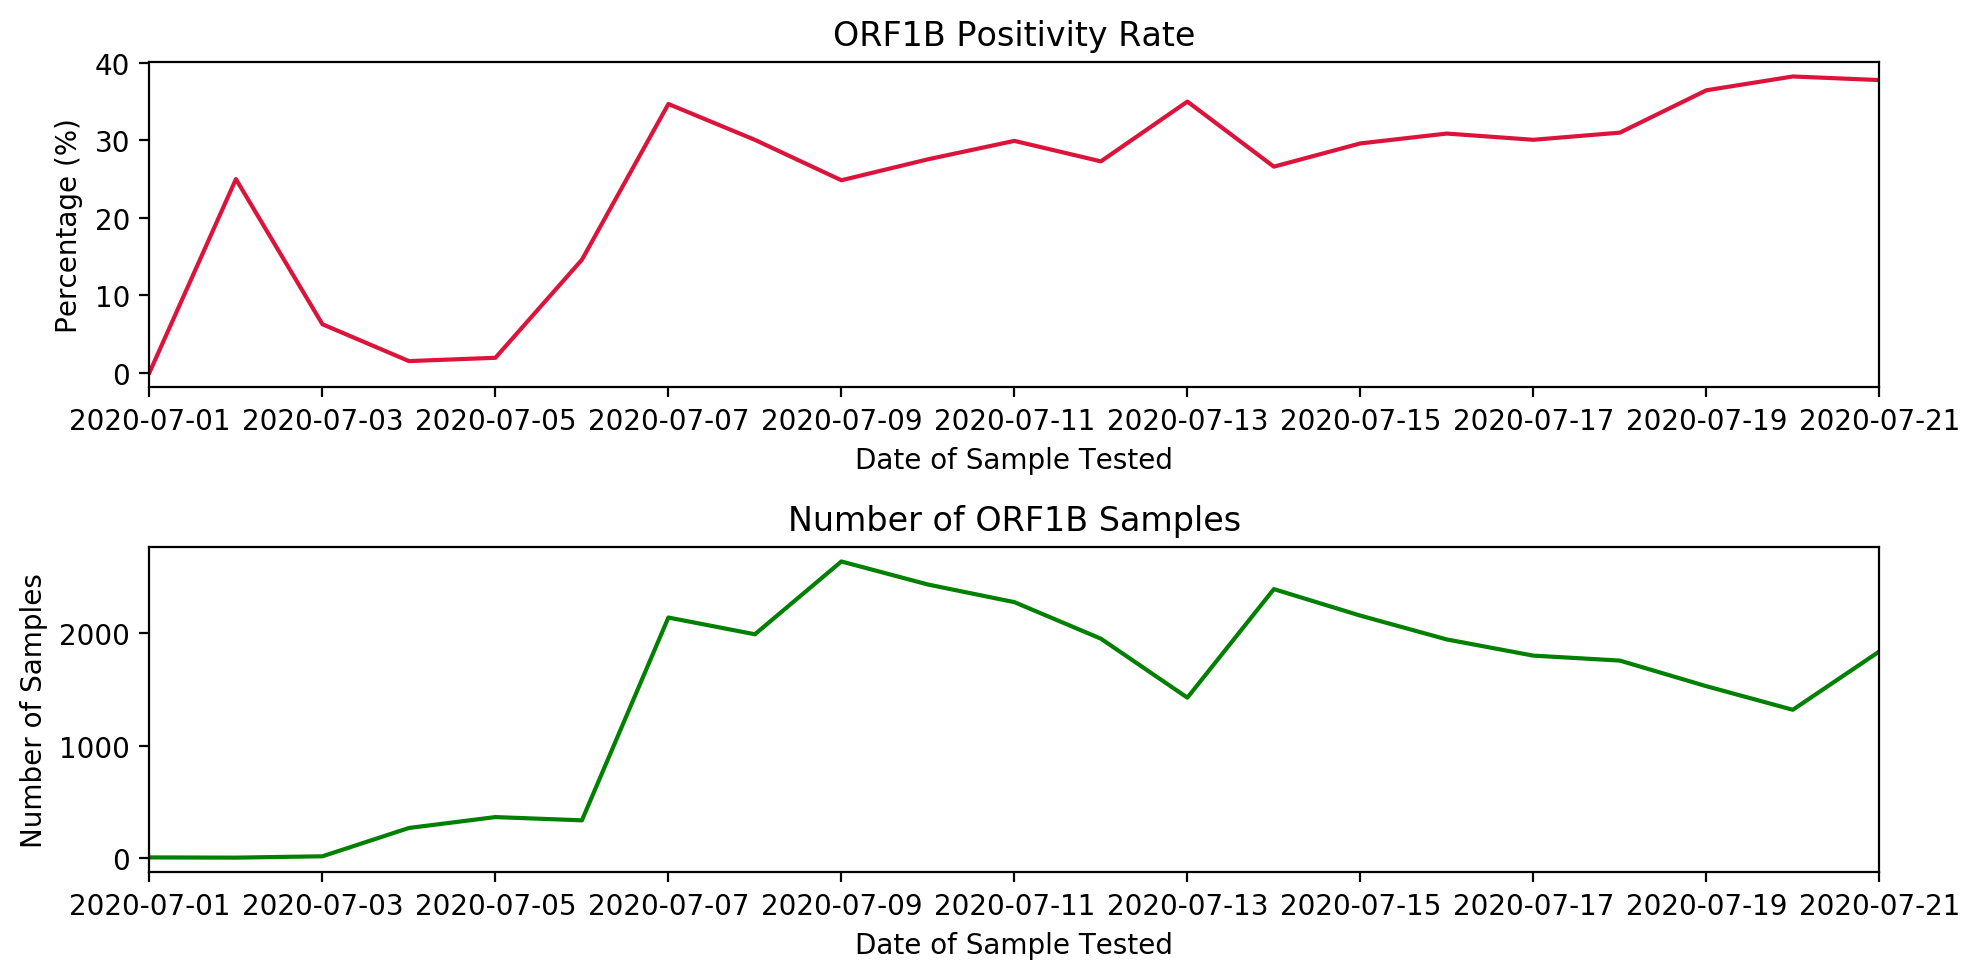

In [53]:
test_ptr_plot(ORF1B_Positivity_Rate,ORF1B_Total,'ORF1B',dates)

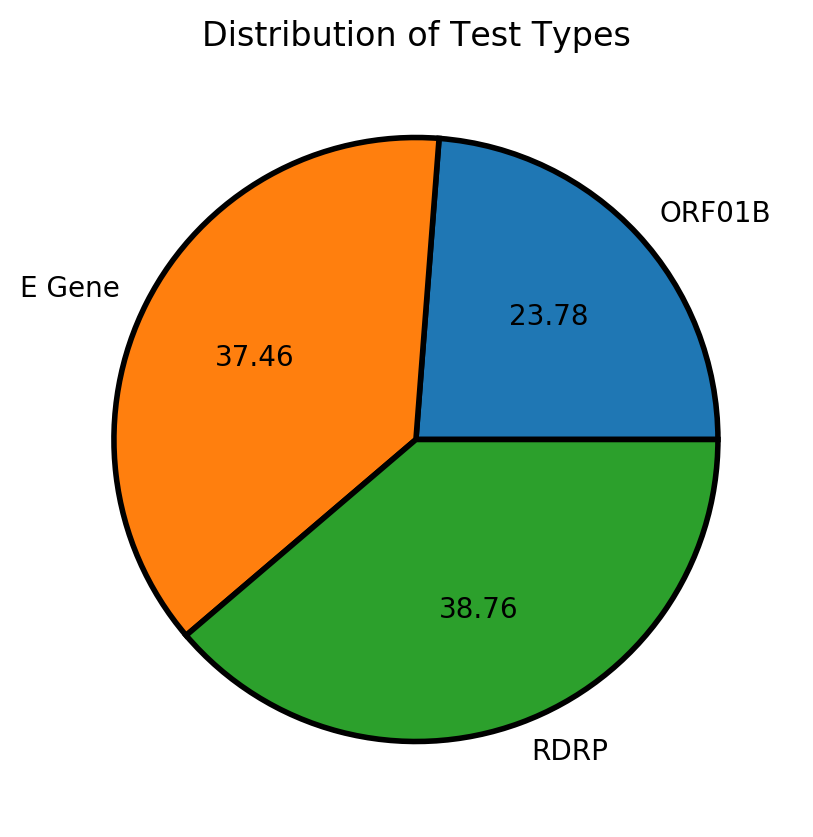

In [54]:
#DISTRUBITION OF TEST TYPES
plt.figure(figsize=(10,5),dpi=200)
plt.pie([sum(ORF1B_Total),sum(EGene_Total),sum(RDRP_Total)],labels=['ORF01B','E Gene','RDRP'],autopct='%1.2f',wedgeprops={'linewidth':2,'edgecolor':'black'})
plt.title('Distribution of Test Types')

#plt.savefig('Distribution_Of_Test_Types_Piechart.png')

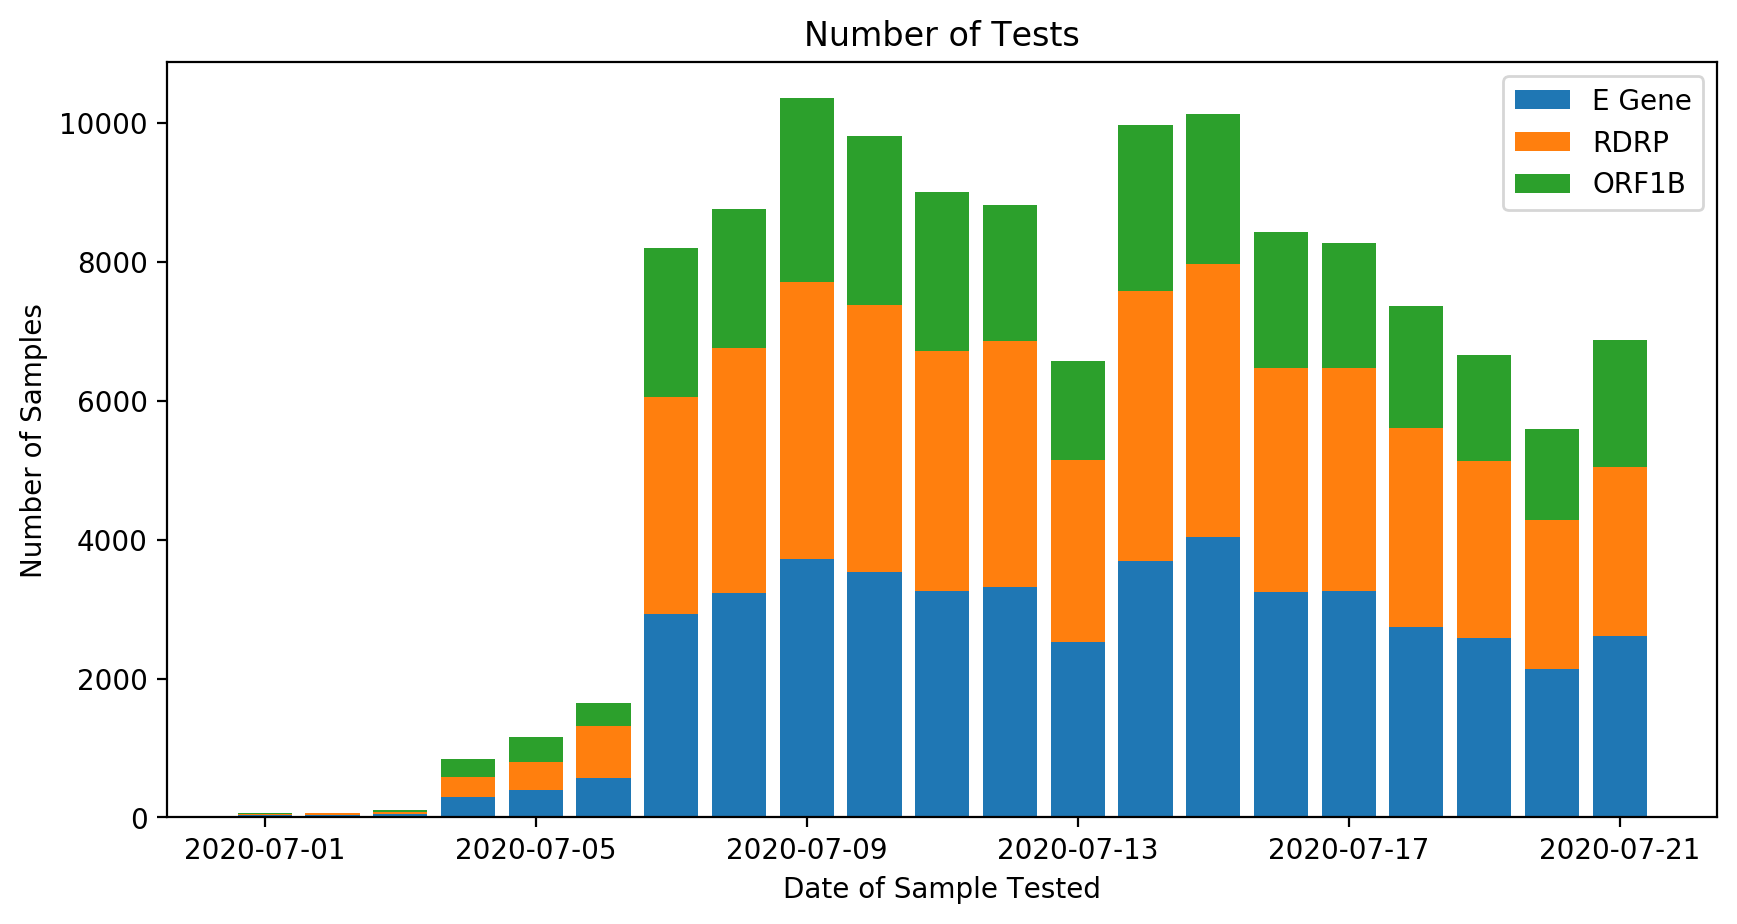

In [55]:
#DISTRIBUTION OF TESTS DAILY
fig,ax = plt.subplots(figsize=(10,5),dpi=200)

ax.bar(np.array(dates),np.array(EGene_Total))
ax.bar(np.array(dates),np.array(RDRP_Total),bottom=np.array(EGene_Total))
ax.bar(np.array(dates),np.array(ORF1B_Total),bottom=np.array(EGene_Total)+np.array(RDRP_Total))

ax.legend(['E Gene','RDRP','ORF1B'])

plt.xlabel('Date of Sample Tested')
plt.ylabel('Number of Samples')
plt.title('Number of Tests')

#plt.savefig('Distribution_Of_Test_Types_Timeseries.png')

In [44]:
#TESTING KITS VISUALIZATION
testing_kits_categorizer()

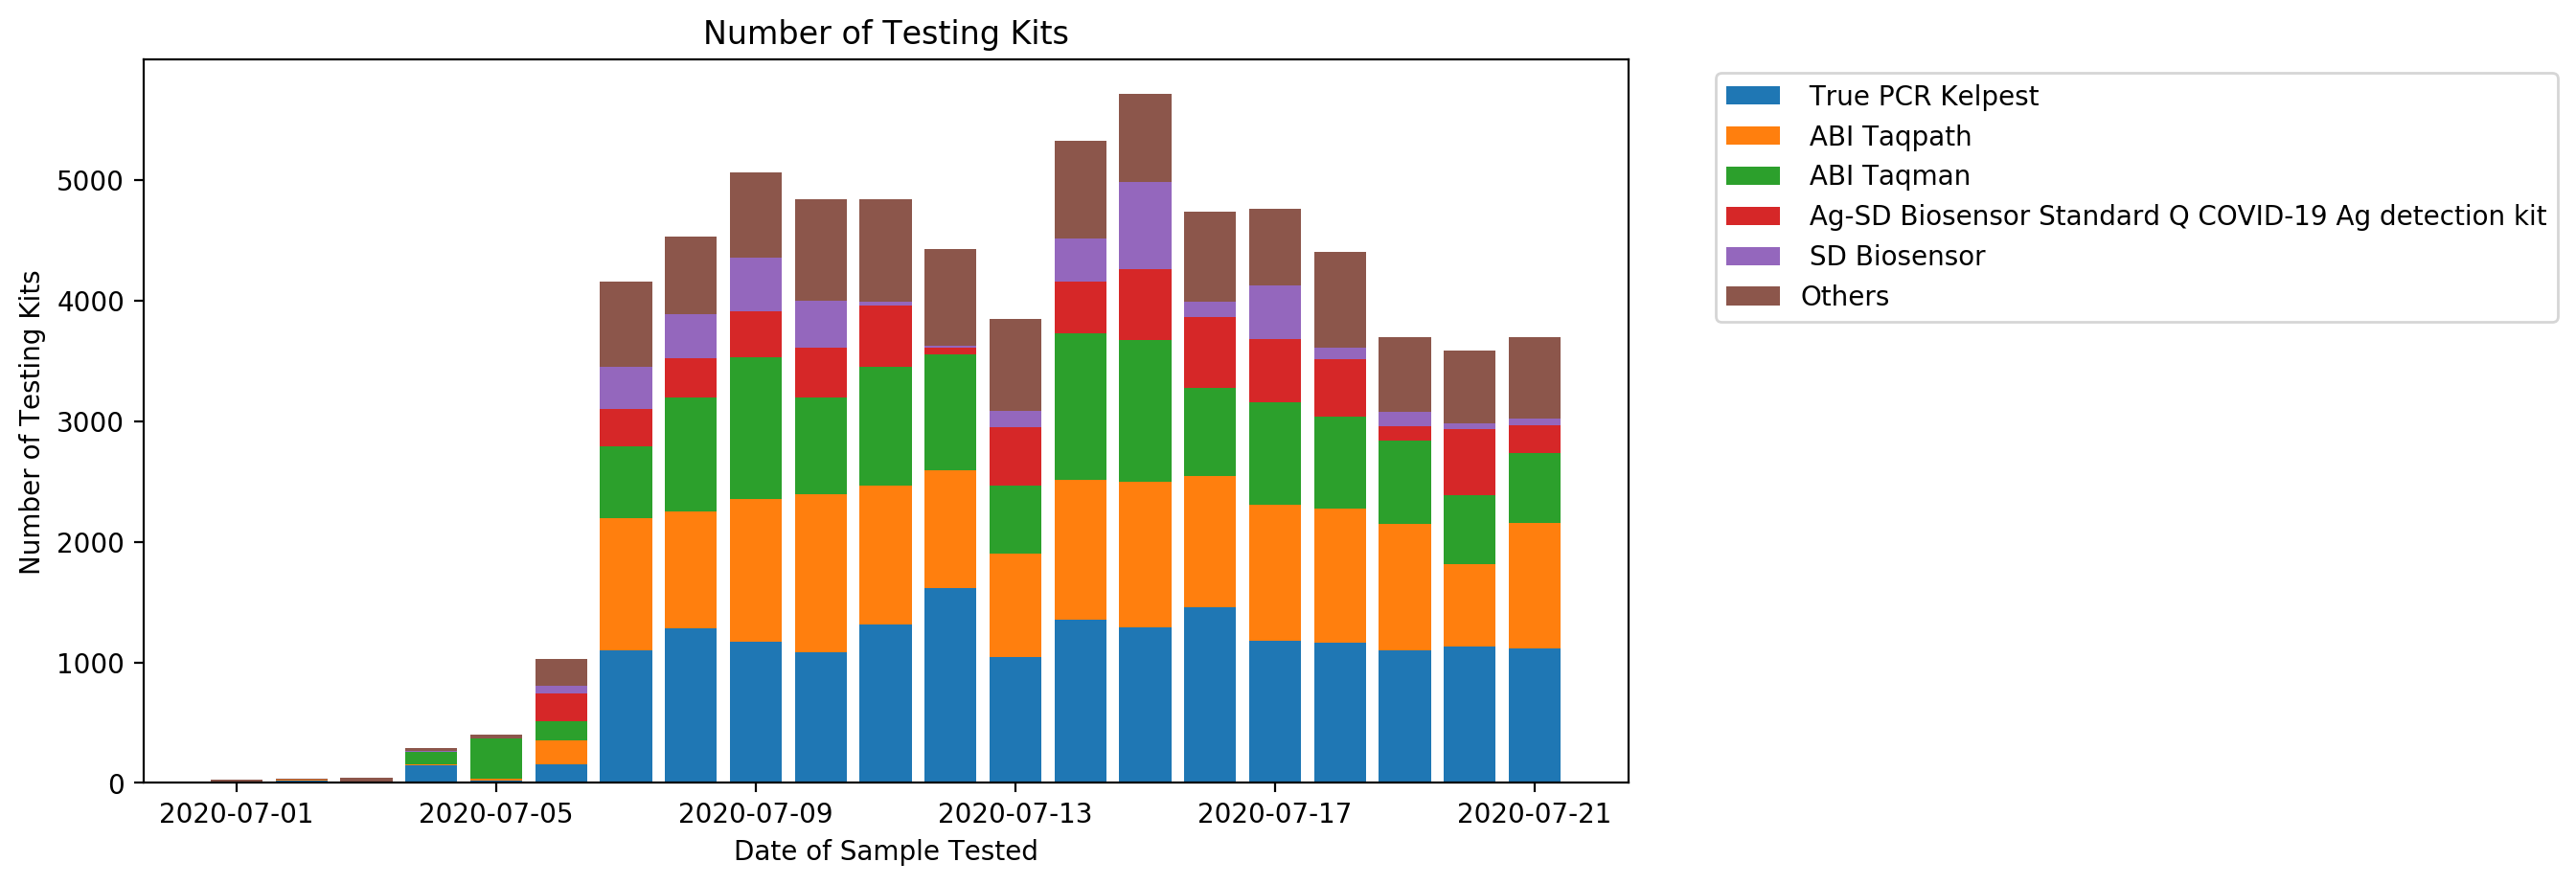

In [57]:
fig,ax = plt.subplots(figsize=(10,5),dpi=200)

ax.bar(np.array(dates),np.array(True_PCR_Kelpest))
ax.bar(np.array(dates),np.array(ABI_Taqpath),bottom=np.array(True_PCR_Kelpest))
ax.bar(np.array(dates),np.array(ABI_Taqman),bottom=np.array(True_PCR_Kelpest)+np.array(ABI_Taqpath))
ax.bar(np.array(dates),np.array(Ag_SD),bottom=np.array(True_PCR_Kelpest)+np.array(ABI_Taqpath)+np.array(ABI_Taqman))
ax.bar(np.array(dates),np.array(SD_Biosensor),bottom=np.array(True_PCR_Kelpest)+np.array(ABI_Taqpath)+np.array(ABI_Taqman)+np.array(Ag_SD))
ax.bar(np.array(dates),np.array(Others),bottom=np.array(True_PCR_Kelpest)+np.array(ABI_Taqpath)+np.array(ABI_Taqman)+np.array(Ag_SD)+np.array(SD_Biosensor))

ax.legend([' True PCR Kelpest', ' ABI Taqpath', ' ABI Taqman',
       ' Ag-SD Biosensor Standard Q COVID-19 Ag detection kit',
       ' SD Biosensor','Others'],bbox_to_anchor=(1.05,1))

plt.xlabel('Date of Sample Tested')
plt.ylabel('Number of Testing Kits')
plt.title('Number of Testing Kits')

#plt.savefig('Distribution_Of_Testing_Kits_Timeseries.png')

In [58]:
pd.DataFrame(data=data[' Testing Kit Used'].value_counts())

,Testing Kit Used
True PCR Kelpest,18757
ABI Taqpath,16235
ABI Taqman,13228
Ag-SD Biosensor Standard Q COVID-19 Ag detection kit,6191
SD Biosensor,3776
Sansure Biotech,2518
Altona,2254
Labgun,1915
Seegene,1252
Abbott Real Time,884


In [59]:
#Age Visualization
data['Age Range'] = data[' Age'].apply(categorize_age)

Text(0.5, 1.0, 'Distribution of Age of Testers')

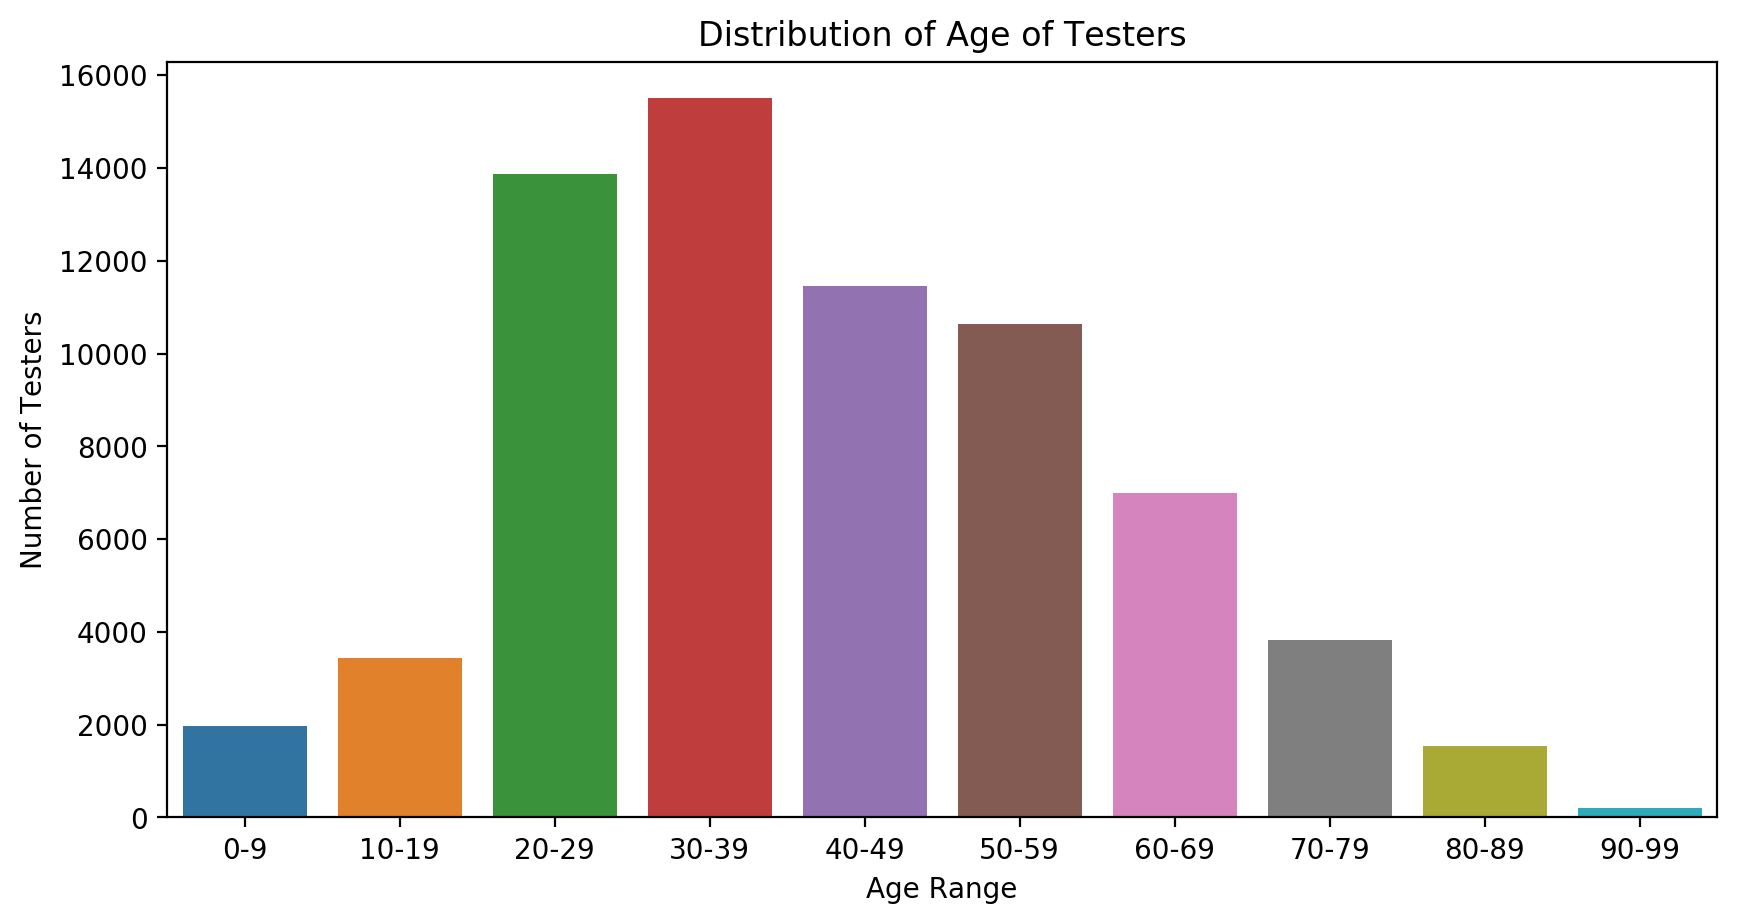

In [61]:
plt.figure(figsize=(10,5),dpi=200)
sns.countplot(x='Age Range',data=data,order=['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99'])
plt.ylabel('Number of Testers')
plt.title('Distribution of Age of Testers')

#plt.savefig('Distribution_Of_Age_Of_Testers.png')

In [62]:
#Gender Visualization
gender_timeseries()

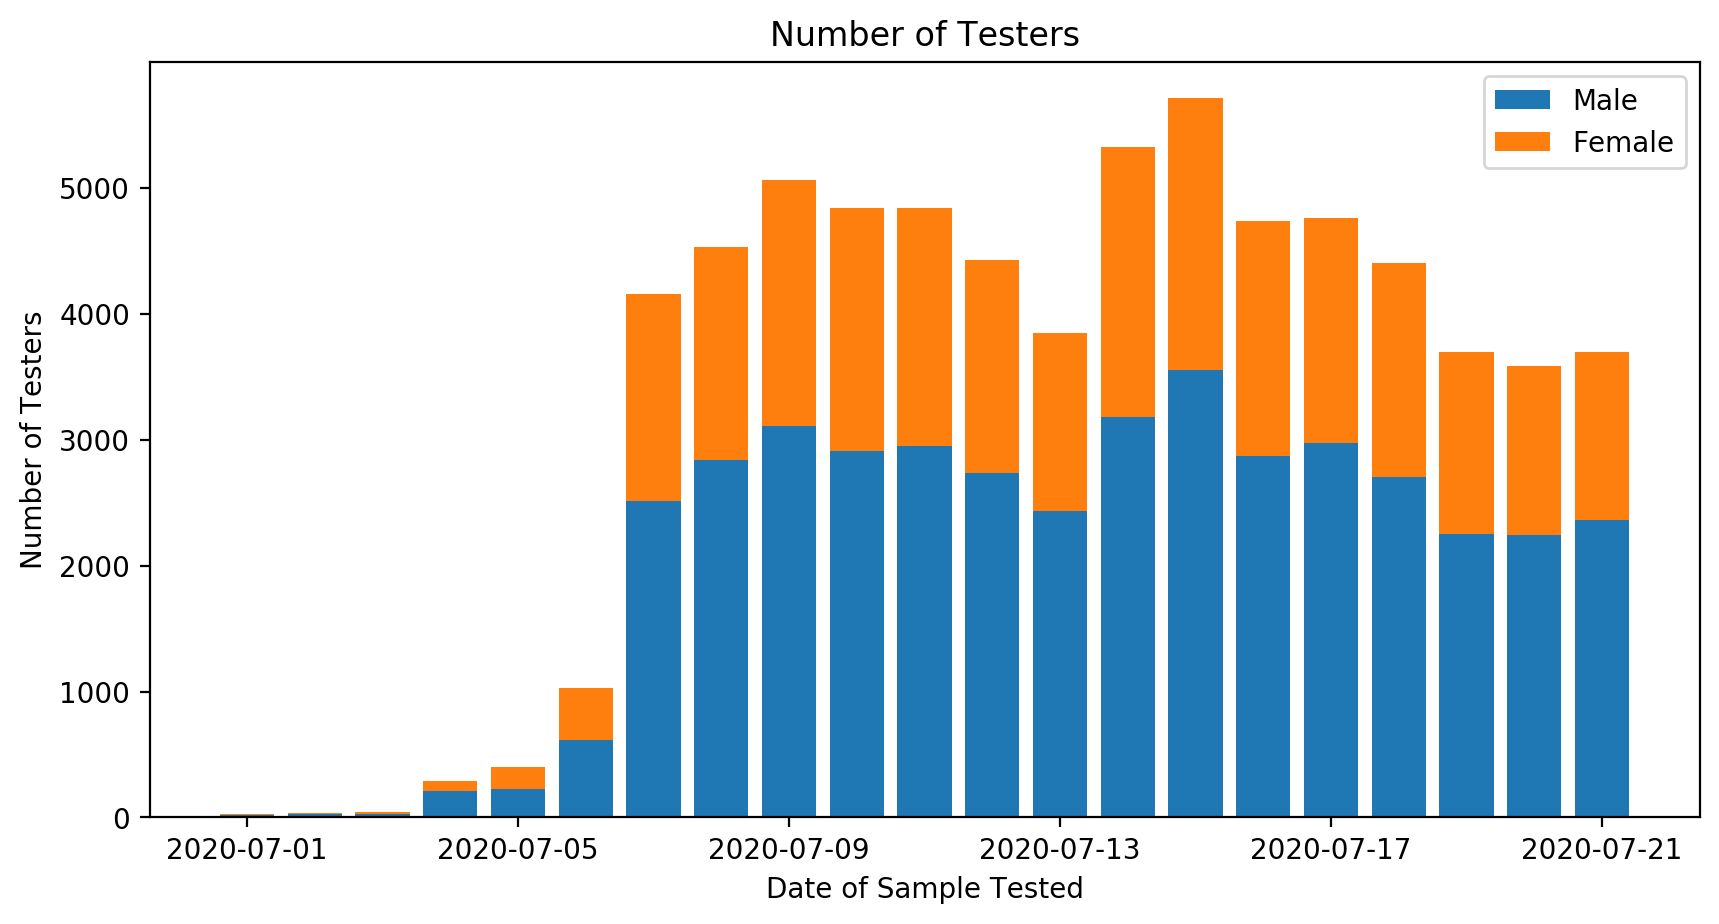

In [64]:
fig,ax = plt.subplots(figsize=(10,5),dpi=200)

ax.bar(np.array(dates),np.array(M))
ax.bar(np.array(dates),np.array(F),bottom=np.array(M))


ax.legend(['Male','Female'])

plt.xlabel('Date of Sample Tested')
plt.ylabel('Number of Testers')
plt.title('Number of Testers')

#plt.savefig('Gender_Distribution_Timeseries.png')

In [65]:
gender_positive_timeseries()

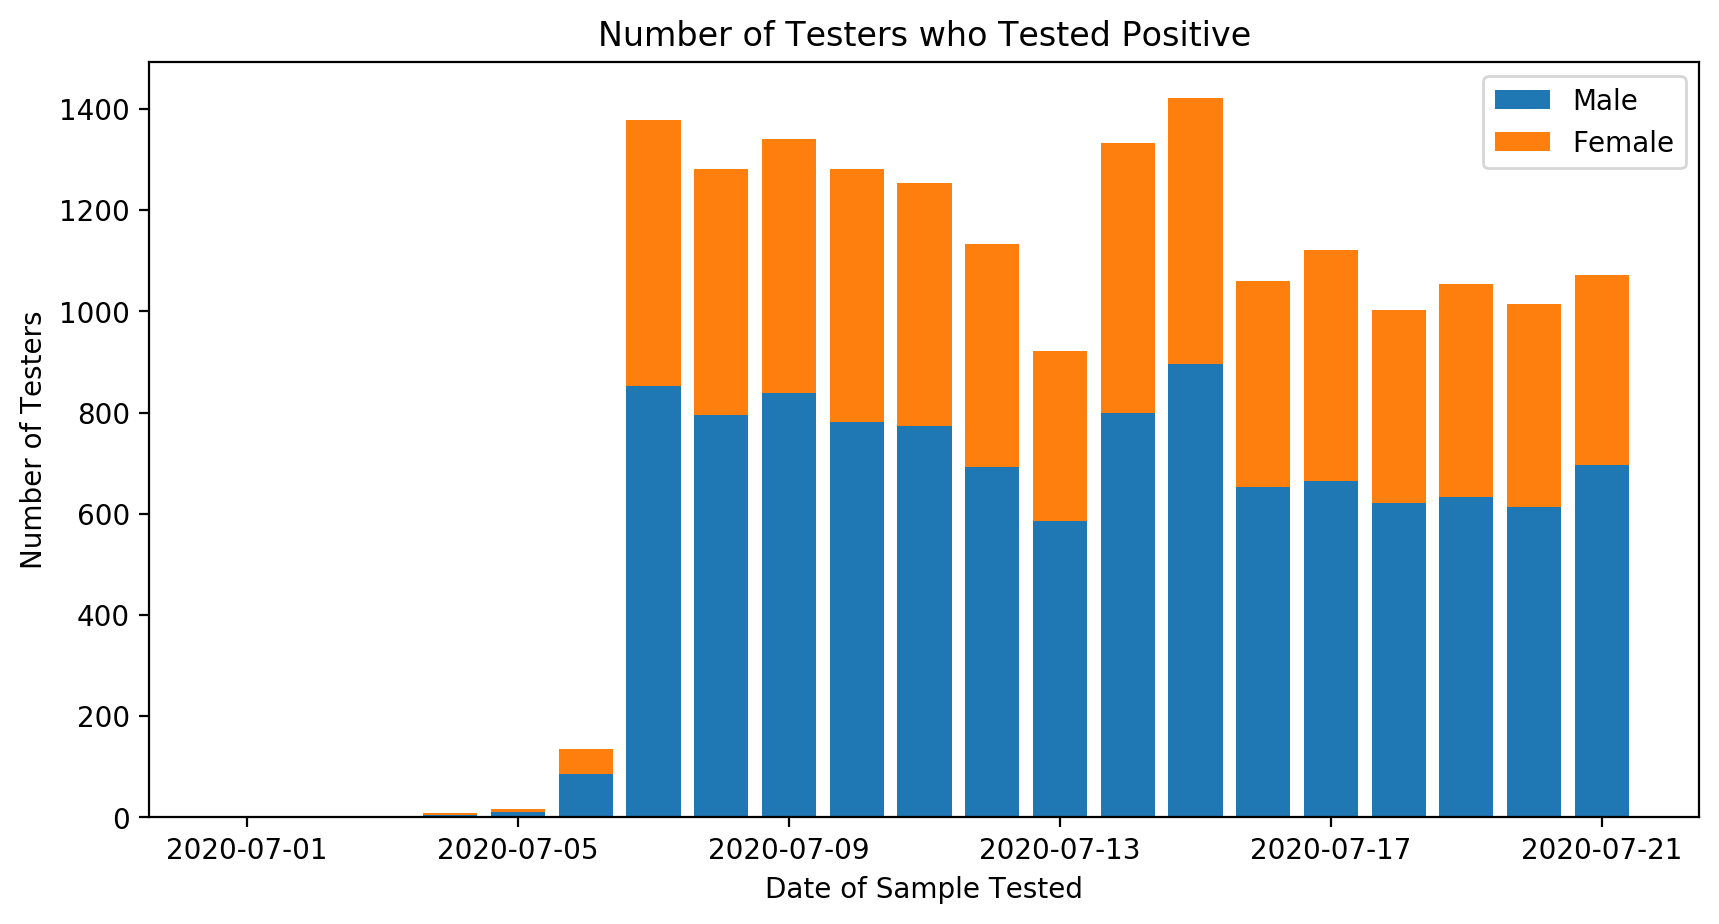

In [66]:
fig,ax = plt.subplots(figsize=(10,5),dpi=200)

ax.bar(np.array(dates),np.array(M_P))
ax.bar(np.array(dates),np.array(F_P),bottom=np.array(M_P))


ax.legend(['Male','Female'])

plt.xlabel('Date of Sample Tested')
plt.ylabel('Number of Testers')
plt.title('Number of Testers who Tested Positive')
#plt.savefig('Gender_Distribution_Of_Positive_Testers_Timeseries.png')

In [67]:
gender_negative_timeseries()

Text(0.5, 1.0, 'Number of Testers who Tested Negative')

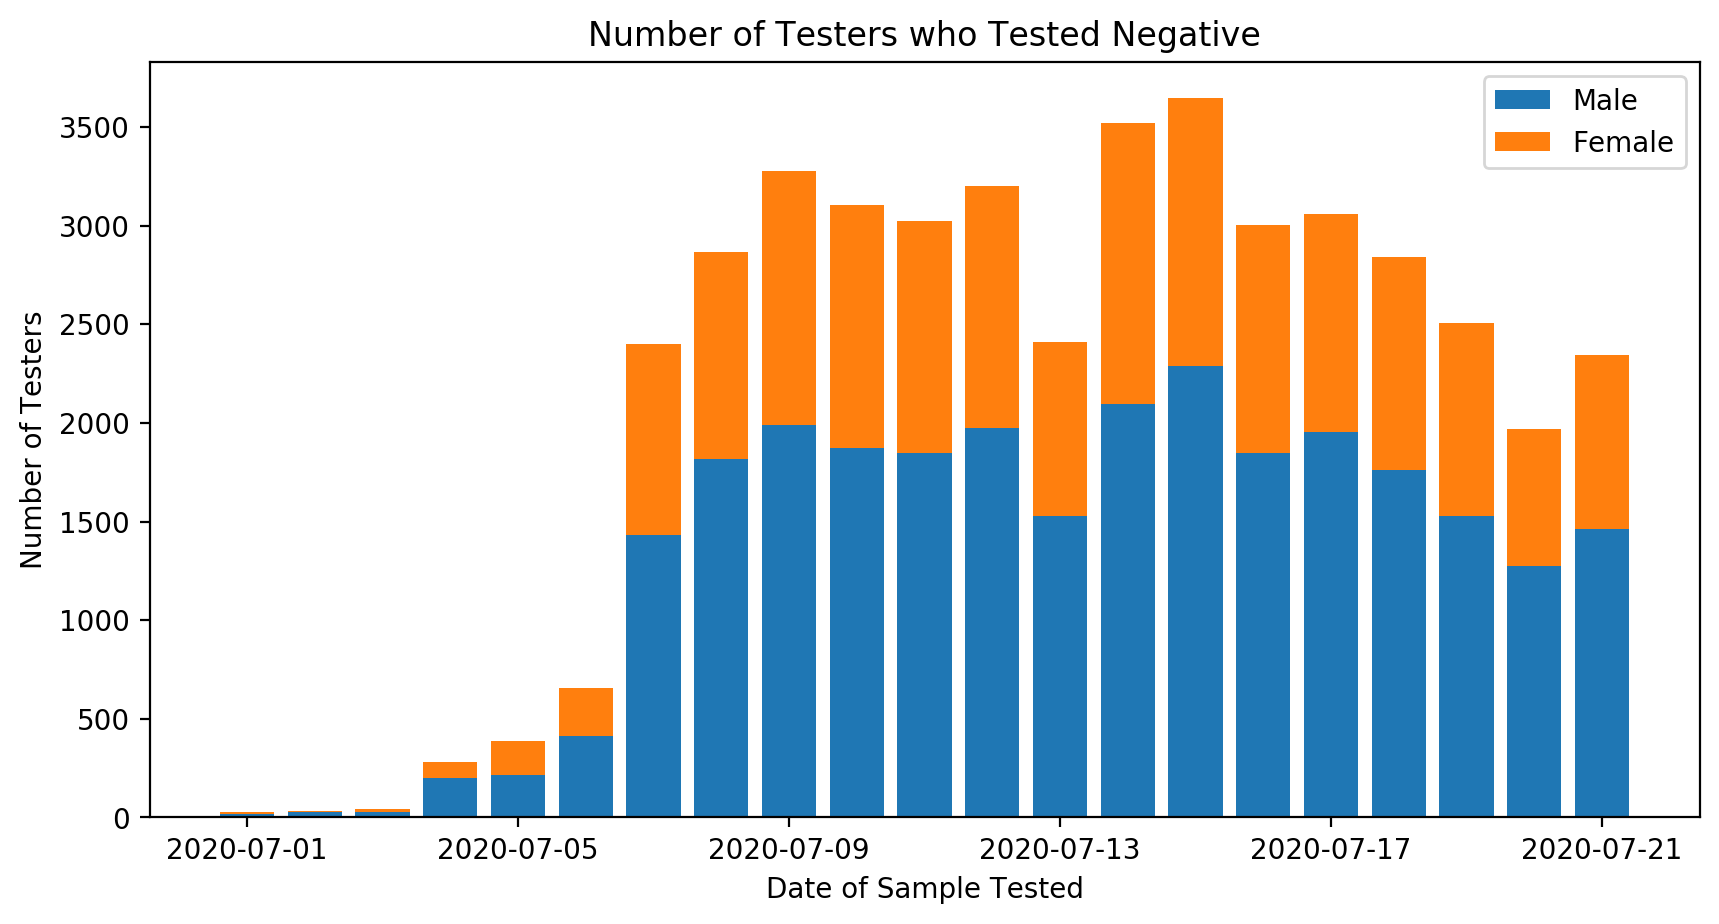

In [69]:
fig,ax = plt.subplots(figsize=(10,5),dpi=200)

ax.bar(np.array(dates),np.array(M_N))
ax.bar(np.array(dates),np.array(F_N),bottom=np.array(M_N))


ax.legend(['Male','Female'])

plt.xlabel('Date of Sample Tested')
plt.ylabel('Number of Testers')
plt.title('Number of Testers who Tested Negative')
#plt.savefig('Gender_Distribution_Of_Negative_Testers_Timeseries.png')